In [1]:
from __future__ import division
from nt_toolbox.general import *
from nt_toolbox.signal import *
%load_ext autoreload
%autoreload 2
%pylab inline
%matplotlib inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/dorin/.local/lib/python3.10/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


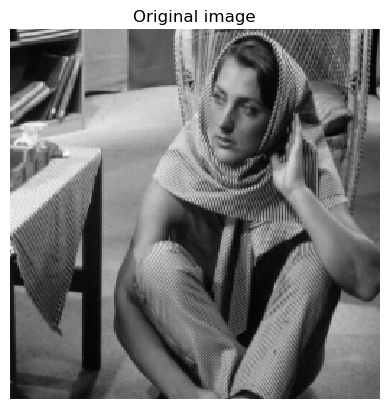

In [8]:
n = 256
name = './barbara.jpg'
f0 = load_image(name, n)
imageplot(f0, 'Original image')


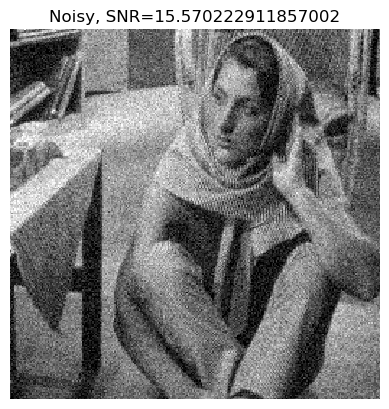

In [9]:
sigma = .08
f = f0 + sigma*random.standard_normal(f0.shape)
imageplot(clamp(f), 'Noisy, SNR=' + str(snr(f0,f)) )


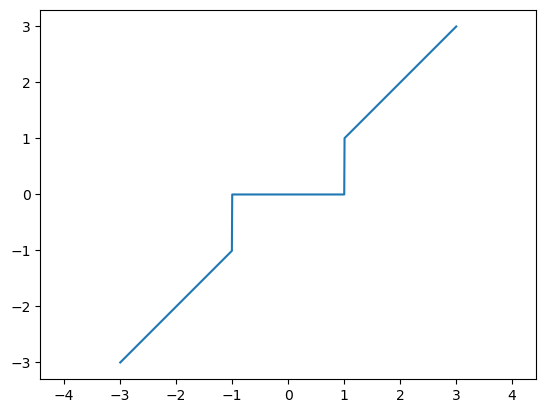

In [10]:
def thresh_hard(u,t):return u*(abs(u)>t)
alpha = linspace(-3,3,1000)
plot(alpha, thresh_hard(alpha,1))
axis('equal');


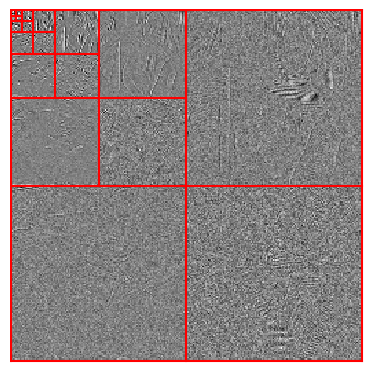

In [11]:
h = [0, .482962913145, .836516303738, .224143868042, -.129409522551]
h = h/norm(h)
Jmin = 2
a = perform_wavortho_transf(f,Jmin,+1,h)
plot_wavelet(a,Jmin);


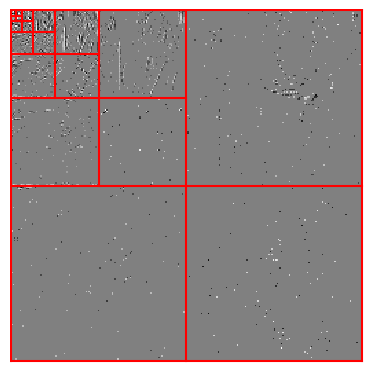

In [12]:
T = 3*sigma
aT = thresh_hard(a,T)
plot_wavelet(aT,Jmin);


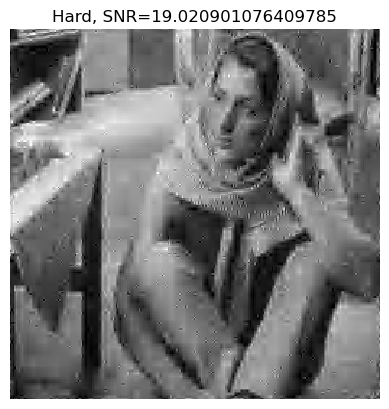

In [13]:
fHard = perform_wavortho_transf(aT,Jmin,-1,h)
imageplot(clamp(fHard), 'Hard, SNR=' + str(snr(f0,fHard)) )
